In [8]:
# import numpy as np

# file = np.load("../tmp/Enamine_REAL_LeadLike_154_X.npz")

In [9]:
from scipy.sparse import load_npz

# X_sparse = load_npz("../tmp/Enamine_REAL_LeadLike_154_X.npz")

In [10]:
import pandas as pd
identifiers = pd.read_csv("../tmp/Enamine_REAL_LeadLike_001_SMILES_IDs.csv")
identifiers_original = pd.read_csv("../tmp/Enamine_REAL_LeadLike_001.csv.zst")

In [11]:
len(identifiers), len(identifiers_original)

(9999921, 10000000)

In [ ]:
for i, (x, y) in enumerate(zip(identifiers["SMILES"].tolist(), identifiers_original["smiles"].tolist()[:identifiers.shape[0]])):
    if x != y:
        print(i, x, y)
        break



In [16]:
identifiers_original["smiles"].tolist()[identifiers.shape[0]-2:]

['CP(C)(=O)CC(=O)NC1=CC=NC(Cl)=C1F',
 'C#CC[C@@H](C)C(=O)NC1=CC=NC(Cl)=C1F',
 'O=C(COCCF)NC1=CC=NC(Cl)=C1F',
 'C#CC[C@H](C)C(=O)NC1=CC=NC(Cl)=C1F',
 'C[C@H]1C[C@]1(F)C(=O)NC1=CC=NC(Cl)=C1F',
 'C[C@@H]1C[C@@]1(F)C(=O)NC1=CC=NC(Cl)=C1F',
 'O=C(NC1=CC=NC(Cl)=C1F)C1=CSN=C1',
 'CC1CCC1C(=O)NC1=CC=NC(Cl)=C1F',
 'O=C(NC1=CC=NC(Cl)=C1F)C1=CCSC1',
 'CCC=C(F)C(=O)NC1=CC=NC(Cl)=C1F',
 'C=C1CC(C(=O)NC2=CC=NC(Cl)=C2F)C1',
 'O=C(NC1=CC=NC(Cl)=C1F)[C@H]1C[C@H](F)C1',
 'CCC/C=C/C(=O)NC1=CC=NC(Cl)=C1F',
 'C=CC(F)(F)C(=O)NC1=CC=NC(Cl)=C1F',
 'CC(C)=C(Br)C(=O)NC1=CC=NC(Cl)=C1F',
 'CCC(C)(F)C(=O)NC1=CC=NC(Cl)=C1F',
 'O=C(NC1=CC=NC(Cl)=C1F)C1CC1(F)Cl',
 'O=C(NC1=CC=NC(Cl)=C1F)C1OCCO1',
 'C=C=CCCC(=O)NC1=CC=NC(Cl)=C1F',
 'COC/C=C/C(=O)NC1=CC=NC(Cl)=C1F',
 'C[C@H]1CC[C@H]1C(=O)NC1=CC=NC(Cl)=C1F |&1:1,4|',
 'CC(=O)CCC(=O)NC1=CC=NC(Cl)=C1F',
 'C=CCC(C)C(=O)NC1=CC=NC(Cl)=C1F',
 'CCO/C=C/C(=O)NC1=CC=NC(Cl)=C1F',
 'O=C(NC1=CC=NC(Cl)=C1F)C1=C(Cl)CC1',
 'O=C(NC1=CC=NC(Cl)=C1F)C1=CSCS1',
 '[N-]=[N+]=NCCC(=O)NC1=CC=N

In [57]:
import io
import csv
import zstandard as zstd

def save_ids(output_smiles, filename):
    """
    Save a list of [SMILES, ID] pairs to a compressed CSV (.csv.zst) file.

    Parameters
    ----------
    output_smiles : list of [str, str]
        List containing SMILES strings and corresponding molecule identifiers.
    filename : str
        Output path for the compressed CSV file.

    Notes
    -----
    The file is written using Zstandard compression (level 10) for efficient storage.
    Rows are streamed directly to the output file to minimize memory usage.
    """
    with open(filename, "wb") as f, zstd.ZstdCompressor(level=10).stream_writer(f) as zf:
        writer = csv.writer(io.TextIOWrapper(zf), delimiter="\t")
        writer.writerow(["SMILES", "ID"])
        print(len(output_smiles))
        writer.writerows(output_smiles)

In [36]:
data = []
for v in identifiers_original.values:
    data += [[v[1]]]

In [37]:
len(data)

10000000

In [58]:
save_ids(data, "test.csv.zst")

10000000


In [59]:
pd.read_csv("test.csv.zst")

,SMILES\tID
0,s_34____34847____28336618
1,s_34____34847____28336718
2,s_34____34847____29909562
3,s_34____34848____9162876
4,s_34____34848____13910610
...,...
9999760,m_11____22358950____22138102
9999761,s_11____22358950____22138108
9999762,s_11____22358950____22138194
9999763,s_11____22358950____22138234


In [5]:
identifiers = set(identifiers['ID'])

In [6]:
identifiers_original['isin'] = [True if i in identifiers else False for i in identifiers_original['id']]

In [7]:
identifiers_original[-120:]

,smiles,id,isin
9999880,CC1=CC=C(NC(=O)C(=O)NCCC2=CN(C)N=C2C)C(Cl)=N1,s_2718____7641028____13810830,True
9999881,CCCN1N=CC=C1NC(=O)C(=O)NCCC1=CN(C)N=C1C,s_2718____7641028____13913736,True
9999882,CC1=CN=C(F)C(NC(=O)C(=O)NCCC2=CN(C)N=C2C)=C1,s_2718____7641028____13951730,True
9999883,CC1=NN(C)C=C1CCNC(=O)C(=O)NC1=CC=C(F)N=C1C,s_2718____7641028____13952376,True
9999884,CCC1=C(C)N=C(NC(=O)C(=O)NCCC2=CN(C)N=C2C)S1,s_2718____7641028____14042886,True
...,...,...,...
9999995,CC1=CC=C(NC(=O)C(=O)NCCC2=CN(C)N=C2C)N=C1C,s_2718____7641028____29066242,False
9999996,CC1=NN(C)C=C1CCNC(=O)C(=O)NC1=C(Cl)C(C)=NN1C,s_2718____7641028____29066494,False
9999997,CSC1=CN=CC(NC(=O)C(=O)NCCC2=CN(C)N=C2C)=C1,s_2718____7641028____29066504,False
9999998,CC1=NN(C)C=C1CCNC(=O)C(=O)NC1=CN=C(O)C(F)=C1,s_2718____7641028____29066554,False


In [22]:
from rdkit.Chem.Draw import IPythonConsole

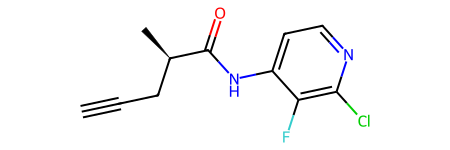

In [17]:
from rdkit import Chem
a = Chem.MolFromSmiles("C#CC[C@@H](C)C(=O)NC1=CC=NC(Cl)=C1F")
a